# SVM on Iris Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
x=df.drop(columns="species")
y=df["species"]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC
model=SVC(kernel="linear",C=1)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.9916666666666667

In [18]:
ypred=model.predict(xtest)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
acc=accuracy_score(ytest,ypred)
acc

0.9333333333333333

In [22]:
cm=confusion_matrix(ytest,ypred)
cm

array([[11,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 10]], dtype=int64)

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



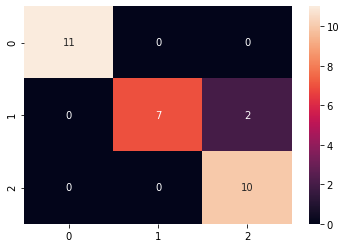

In [24]:
sns.heatmap(cm,annot=True)

## Tunning Hyperparameter

In [25]:
# Create Model
model=SVC()

In [26]:
# Assign parameter
kernel=['linear', 'poly', 'rbf', 'sigmoid']
C=[100,50,10,1,0.1,0.01]
gamma=['scale','auto']

In [27]:
# grid
grid={"kernel":kernel,"C":C,"gamma":gamma}

In [30]:
#cross_validator
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [31]:
#grid_search_cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy")

In [32]:
#result
res=grid_cv.fit(xtrain,ytrain)

In [33]:
res.best_params_

{'C': 50, 'gamma': 'scale', 'kernel': 'linear'}

In [34]:
res.best_score_

0.9916666666666668